## Step 1: Cleanup data

In [1]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# drop duplicate/analogous columns
titanic = titanic.drop(['alive', 
                        'adult_male', 
                        'pclass', 
                        'embarked'], axis=1)
titanic.rename(columns={'embark_town': 'embarked'}, inplace=True)
titanic.head()

,survived,sex,age,sibsp,parch,fare,class,who,deck,embarked,alone
0,0,male,22.0,1,0,7.2500,Third,man,NaN,Southampton,False
1,1,female,38.0,1,0,71.2833,First,woman,C,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,woman,NaN,Southampton,True
3,1,female,35.0,1,0,53.1000,First,woman,C,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,man,NaN,Southampton,True


In [3]:
# take care of missing data
titanic['embarked'] = titanic['embarked'].fillna(method='ffill')
titanic = titanic.drop(['deck'], axis=1)
titanic['age'] = titanic['age'].fillna(method='ffill')
titanic.head()

,survived,sex,age,sibsp,parch,fare,class,who,embarked,alone
0,0,male,22.0,1,0,7.2500,Third,man,Southampton,False
1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,woman,Southampton,True
3,1,female,35.0,1,0,53.1000,First,woman,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,man,Southampton,True


In [4]:
# convert binomials and categoricals to encoded labels
from sklearn.preprocessing import LabelEncoder
titanic_encoded = titanic.copy() # keep the original, as we ll need both in different scenarios
for label in ['sex', 'class', 'who', 'embarked', 'alone']:
  titanic_encoded[label] = LabelEncoder().fit_transform(titanic_encoded[label])

titanic_encoded.head()

,survived,sex,age,sibsp,parch,fare,class,who,embarked,alone
0,0,1,22.0,1,0,7.2500,2,1,2,0
1,1,0,38.0,1,0,71.2833,0,2,0,0
2,1,0,26.0,0,0,7.9250,2,2,2,1
3,1,0,35.0,1,0,53.1000,0,2,2,0
4,0,1,35.0,0,0,8.0500,2,1,2,1


## Step 2: Start with a Heatmap for the correlation matrix

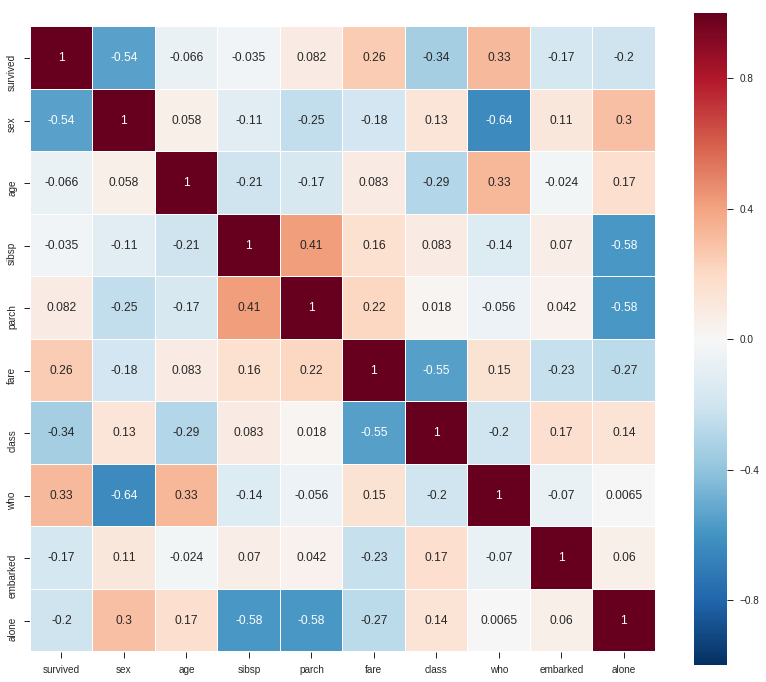

In [5]:
import matplotlib.pyplot as plt
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(14, 12))
sns.heatmap(titanic_encoded.astype(float).corr(), 
            linewidths=0.1, 
            square=True, 
            linecolor='white', 
            annot=True)
plt.show()

### Observations from the `survived` column

1.   strong relation with `sex`
2.   potential relation with `class` (or `fare`)
3.   explore relation with `who`



## Step 3: Try Pair Plots for a different view of correlations

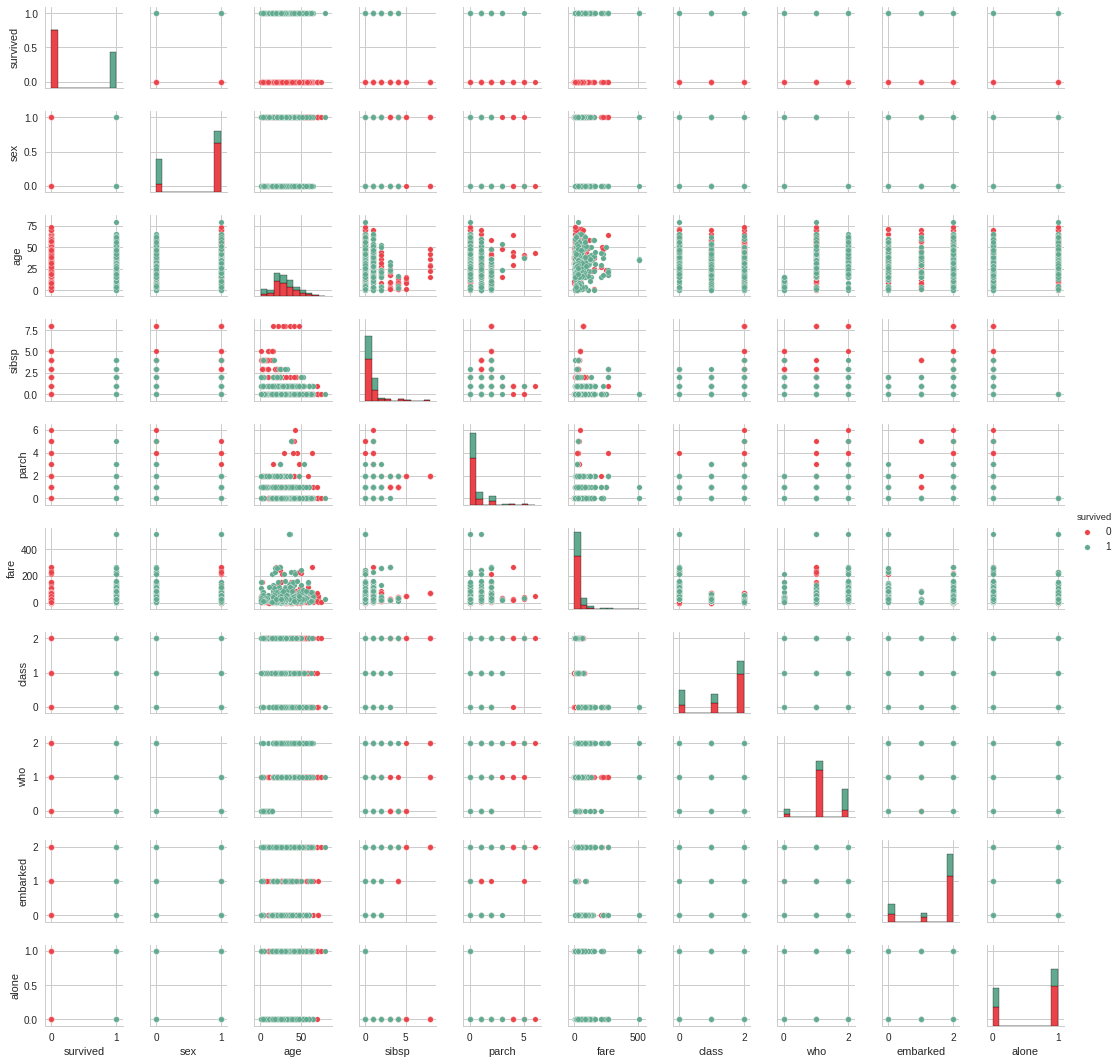

In [6]:
sns.set(style='whitegrid', color_codes=True)
sns.pairplot(titanic_encoded, 
             kind='scatter', 
             hue='survived', 
             size=1.5, 
             plot_kws={'s': 30}, 
             diag_kws={'edgecolor':'black'}, 
             palette={0:'#EB434A', 1:'#61A98F'});

## Step 4: Check 'survived' v/s 'sex'

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


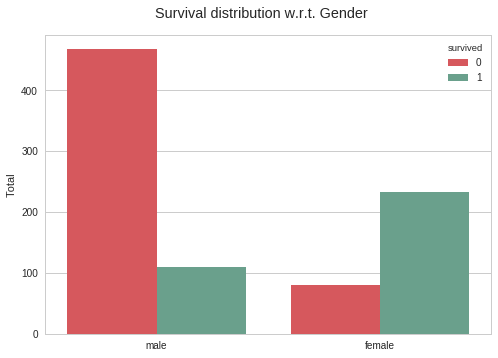

In [7]:
fig = plt.figure()
ax = sns.countplot(x='sex', 
                   hue='survived', 
                   palette={0:'#EB434A', 1:'#61A98F'}, 
                   data=titanic)
ax.set(xlabel='', ylabel='Total')
fig.suptitle("Survival distribution w.r.t. Gender", y=0.95);

### Observations

1.   A much larger percentage of females survived, as compared to men. This points to the fact that females were given higher priority in the survival/evacuation process.
2.   An interesting next step would be to check if any preference was given to `age` – were younger people given higher priority?




## Step 5: Check 'survived' v/s 'age'

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


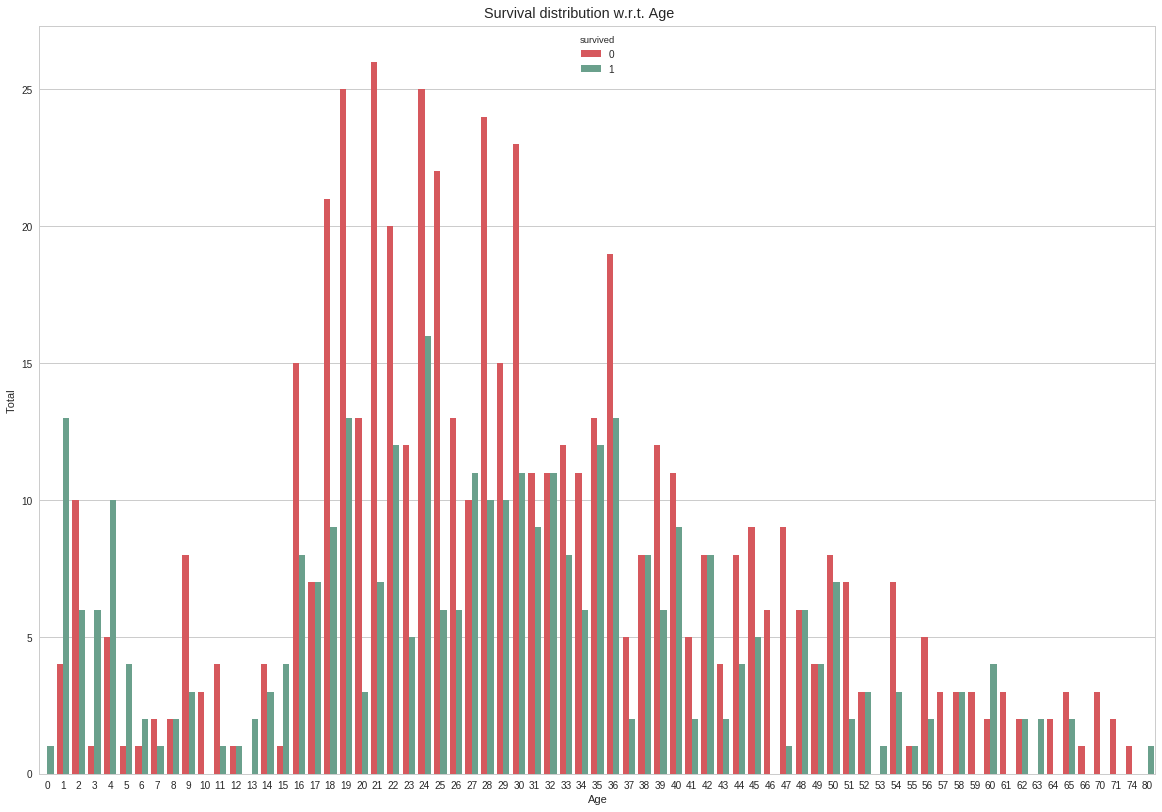

In [8]:
data = titanic_encoded.copy()
data['age'] = data['age'].apply(lambda h: round(h))

fig = plt.figure(figsize=(20, 5.5/8*20))
ax = sns.countplot(x='age', 
                   hue='survived', 
                   palette={0:'#EB434A', 1:'#61A98F'}, 
                   data=data)
ax.set(xlabel='Age', ylabel='Total')
fig.suptitle("Survival distribution w.r.t. Age", y=0.9);

### Observations


1.   Young babies expectedly have the highest survival ratio
2.   Following that comes the 'young' age group of 20-30, after which the survival ratio decreases with age
3.   One interesting finding is that kids in the age group of 7-18 actually have much lower survival ratio as compared to the surrounding age groups (this could probably be related to the fact that this age group wasn't old enough to be allowed to travel with their mothers, and weren't strong enough to survive by themselves)


## Step 6: Check 'survived' v/s 'who'

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


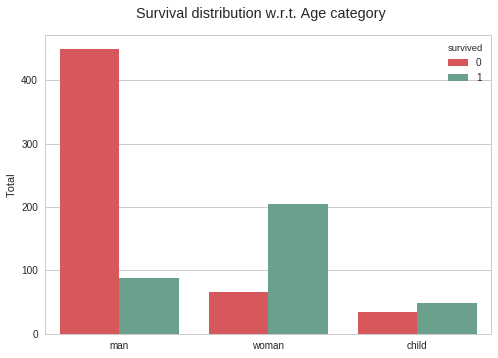

In [9]:
fig = plt.figure()
ax = sns.countplot(x='who', 
                   hue='survived', 
                   palette={0:'#EB434A', 1:'#61A98F'}, 
                   data=titanic)
ax.set(xlabel='', ylabel='Total')
fig.suptitle("Survival distribution w.r.t. Age category", y=0.95);

### Observations


1.   This confirms our observations from Step4 and Step5, children and women were definitely given higher priority than men.
2.   Another interesting point to note is that women have a much higher survival rate than children. We might have to look more into the exact definition of `child` in this dataset, but this does seem to support Step5's observation, that though babies had a higher survival rate, the same is not true for teens.



## Step 7: Check 'survived' v/s 'class'

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


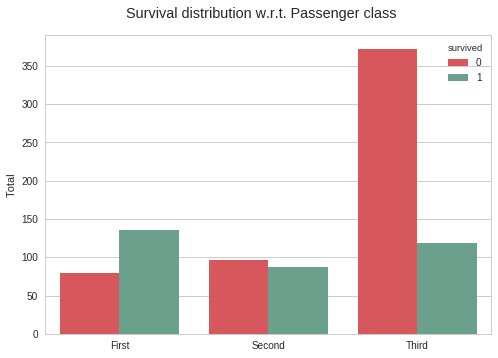

In [10]:
fig = plt.figure()
ax = sns.countplot(x='class', 
                   hue='survived', 
                   palette={0:'#EB434A', 1:'#61A98F'}, 
                   data=titanic)
ax.set(xlabel='', ylabel='Total')
fig.suptitle("Survival distribution w.r.t. Passenger class", y=0.95);

### Observations

1.   As expected, the survival rate decreases as the class goes from First to Third.
2.   The plot shows that a very low percentage of the Third class survived, where as the survival rate in First and Second was above 50%.


# Related blog post
https://medium.com/@navjotts/analyzing-a-dataset-the-step1-of-machine-learning-which-often-gets-overlooked-415ca65ed2f1